<img src="banner/banner_proyecto.png" style="width:1000px;">

# <b style="color:#152F6E"> PREDICCIÓN DE ACEPTACIÓN DE UNA SOLICITUD DE TARJETA DE CRÉDITO </b>

<h1 style="font-size:25px;">Problema</h1>

Las industrias bancarias reciben miles de solicitudes de solicitud de tarjeta de crédito. Anterior y actualmente estas industrias revisan cada solicitud de manera manual, lo que conlleva demasiado tiempo y propenso a errores humanos.


<h1 style="font-size:25px;">Introducción</h1>

Actualmente las Fintech startups como Lineru facilitan el acceso a préstamos a través de la tecnología, proponen una mejor forma de hacer estos trámites, ofreciendo créditos online que garantizan obtener tu dinero de forma ágil y segura sin la necesidad de hacer largas filas. Siguiendo el ejemplo de Lineru, su sistema funciona a través de un algoritmo Machine Learning, el cual evalúa todos los datos que se ingresa a través de un formulario de inscripción, además de esto, su sistema realiza el análisis de cerca de 500 variables que permite construir un perfil de riesgo y un monto adecuado para el solicitante.

<h1 style="font-size:25px;">Objetivo</h1> 

Los algoritmos que se utilizan para decidir el resultado de las solicitudes de crédito varían de un proveedor a otro y entre sectores y geografías. Sin embargo, existen altos grados de similitud en los atributos utilizados para generar esos algoritmos. 
    
En este proyecto se analiza los datos de la solicitud de crédito tomados del <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">repositorio de aprendizaje automático UCI</a>.
<br><br>
Se calculan diversas técnicas de preprocesamiento, como el análisis exploratorio de datos y las transformaciones de datos, como el manejo de valores perdidos, valores continuos y valores categóricos. Se adoptan varias técnicas de visualización de datos para comprender los datos. Los modelos analíticos como las técnicas de regresión y clasificación se generan e implementan en los datos. 


1.Primero, cargamos y vemos el conjunto de datos. Descubrimos que dado que estos datos son confidenciales, el contribuyente del conjunto de datos ha anonimizado los nombres de las funciones.

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [75]:
# carga dataset
cc_apps = pd.read_csv("dataset/cc_approvals.data",header=None)

# cc_apps2 = CC_data[:,:]
cc_apps2 = cc_apps.copy()

# Inspeccionar datos
print(cc_apps.head())

  0      1      2  3  4  5  6     7  8  9   10 11 12     13   14 15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  f  g  00202    0  +
1  a  58.67  4.460  u  g  q  h  3.04  t  t   6  f  g  00043  560  +
2  a  24.50  0.500  u  g  q  h  1.50  t  f   0  f  g  00280  824  +
3  b  27.83  1.540  u  g  w  v  3.75  t  t   5  t  g  00100    3  +
4  b  20.17  5.625  u  g  w  v  1.71  t  f   0  f  s  00120    0  +


## <span style="color:orange">Renombrando las columnas</span>: 
Las columnas no estaban identificadas con fines de privacidad en una publicación de Ryan Kuhn muestra que las columnas probablemente sean Sexo, Edad, Deuda, Casado, Cliente bancario, Nivel educativo, Etnia, Años Empleado, Predeterminado, Empleado, CreditScore, DriversLicense, Citizen, ZipCode, Income y finalmente el ApprovalStatus. Entonces cambiamos el nombre de las columnas del DataFrame.

In [76]:
cc_apps.columns = ['Gender', 'Age', 'Debt', 'Married',
              'BankCustomer', 'EducationLevel', 'Ethnicity',
              'YearsEmployed', 'PriorDefault',
              'Employed', 'CreditScore', 'DriversLicense',
              'Citizen', 'ZipCode', 'Income', 'ApprovalStatus']
cc_apps2.columns = ['Gender', 'Age', 'Debt', 'Married',
              'BankCustomer', 'EducationLevel', 'Ethnicity',
              'YearsEmployed', 'PriorDefault',
              'Employed', 'CreditScore', 'DriversLicense',
              'Citizen', 'ZipCode', 'Income', 'ApprovalStatus']

cc_apps.head()


,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


### Inspeccionando las solicitudes 
 


In [77]:

# Imprimir resumen de estadísticas
cc_apps_description = cc_apps.describe()
print(cc_apps_description)

print("\n")

# imprime informacion del dataframe
cc_apps_info = cc_apps.info()
print(cc_apps_info)

print("\n")

# Inspeccionar valores perdidos en el conjunto de datos
cc_apps.tail(17)

             Debt  YearsEmployed  CreditScore         Income
count  690.000000     690.000000    690.00000     690.000000
mean     4.758725       2.223406      2.40000    1017.385507
std      4.978163       3.346513      4.86294    5210.102598
min      0.000000       0.000000      0.00000       0.000000
25%      1.000000       0.165000      0.00000       0.000000
50%      2.750000       1.000000      0.00000       5.000000
75%      7.207500       2.625000      3.00000     395.500000
max     28.000000      28.500000     67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            690 non-null object
Age               690 non-null object
Debt              690 non-null float64
Married           690 non-null object
BankCustomer      690 non-null object
EducationLevel    690 non-null object
Ethnicity         690 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object


,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


Como podemos ver desde nuestro primer vistazo a los datos, el conjunto de datos tiene una combinación de características numéricas y no numéricas. Esto se puede solucionar con algo de preprocesamiento, pero antes de hacerlo, anlizamos un poco más sobre el conjunto de datos  para ver si habian otros problemas del conjunto de datos que debian corregirse.

### Manejo de los valores faltantes (parte1)

El conjunto de datos tiene valores faltantes. Los valores que faltan en el conjunto de datos están etiquetados con '?', Que se puede ver en la salida de la última celda.
Se remplaza temporalmente estos signos de interrogación con NaN

In [78]:
import numpy as np

# Inspeccionar valores perdidos en el conjunto de datos
print(cc_apps.isnull().values.sum())

# remplaza '?'con NaN
cc_apps.replace('?', np.NaN, inplace = True)

# Inspeccione los valores faltantes nuevamente
cc_apps.tail(17)

0


,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


In [79]:
# convierte Age a numerico
cc_apps["Age"] = pd.to_numeric(cc_apps["Age"])

### Manejo de los valores faltantes (parte2)


Para los valores perdidos se remplazan los valores faltantes con una estrategia llamada imputación media.

In [80]:
# Imputar los valores faltantes con imputación media
cc_apps.fillna(cc_apps.mean(), inplace=True)

# cuenta el numero de NaNs en el dataset y

print(cc_apps.isnull().values.sum())


55


In [81]:
cc_apps.isnull().sum()

Gender            12
Age                0
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

### 3. Descripción y distribución de datos

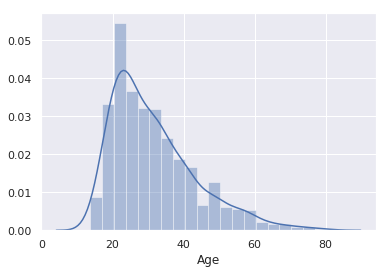

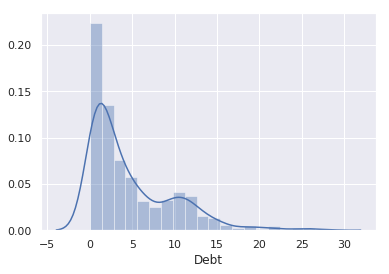

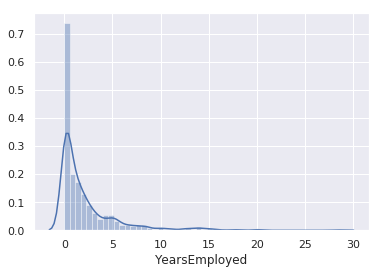

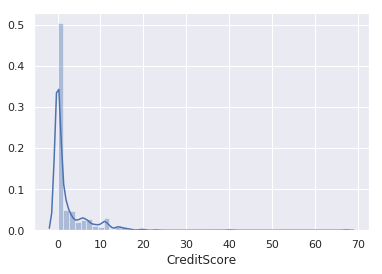

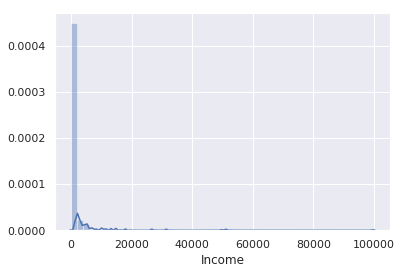

In [82]:

def plotDistPlot(col):
    """Flexibly plot a univariate distribution of observation"""
    sns.distplot(col)
    plt.show()
plotDistPlot(cc_apps['Age'])
plotDistPlot(cc_apps['Debt'])
plotDistPlot(cc_apps['YearsEmployed'])
plotDistPlot(cc_apps['CreditScore'])
plotDistPlot(cc_apps['Income'])

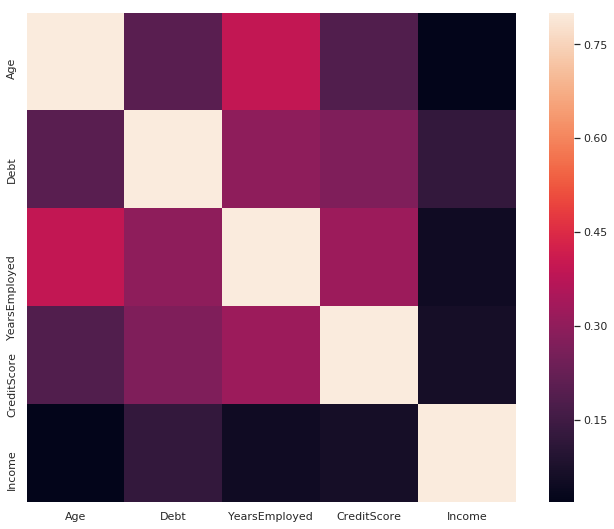

In [83]:

#matriz de correlación
corrmat = cc_apps.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

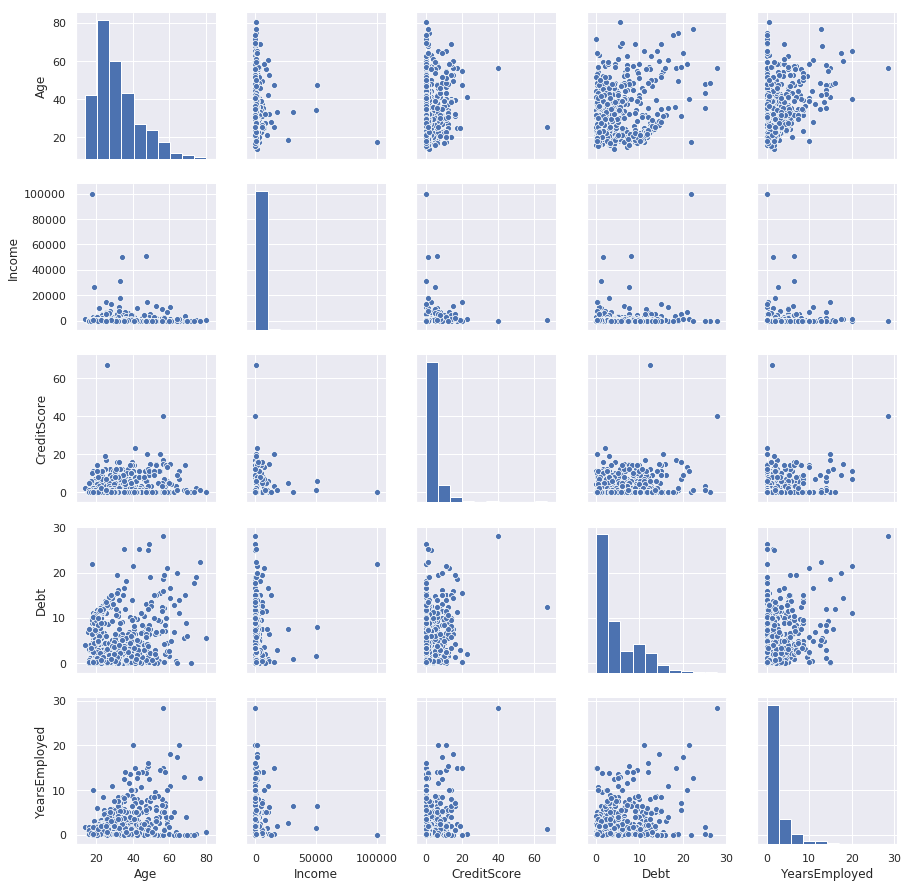

In [84]:
#scatterplot
sns.set()
cols = ['Age', 'Income', 'CreditScore', 'Debt', 'YearsEmployed']
sns.pairplot(cc_apps[cols], size = 2.5)
plt.show();

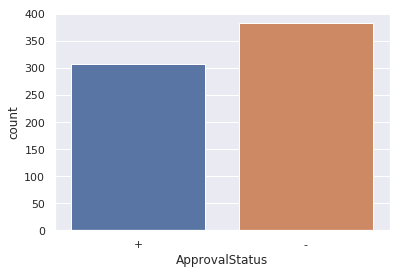

In [85]:

sns.countplot(data = cc_apps, x = 'ApprovalStatus')

### Manejo de los valores faltantes (parte3)
Se remplazan los valores faltantes con los valores más frecuentes,como están presentes en las columnas respectivas. Esta es una buena práctica cuando se trata de imputar valores faltantes para datos categóricos en general.

In [86]:
cc_apps.isnull().sum()

Gender            12
Age                0
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

In [87]:
# Iterar sobre cada columna de cc_apps
print(cc_apps.info())
for col in cc_apps.columns:
    # Compruebe si la columna es de tipo de objeto
    if cc_apps[col].dtypes == 'object':
        # Imputar con el valor más frecuente
        cc_apps[col] = cc_apps[col].fillna(cc_apps[col].value_counts().index[0])
        # Para columnas numéricas, reemplace nan con la media.
    else:
        cc_apps[col] = cc_apps[col].fillna(cc_apps[col].mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            678 non-null object
Age               690 non-null float64
Debt              690 non-null float64
Married           684 non-null object
BankCustomer      684 non-null object
EducationLevel    681 non-null object
Ethnicity         681 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           677 non-null object
Income            690 non-null int64
ApprovalStatus    690 non-null object
dtypes: float64(3), int64(2), object(11)
memory usage: 86.3+ KB
None


In [88]:
cc_apps.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [89]:
from sklearn.preprocessing import LabelEncoder

#Instanciar LabelEncoder

le = LabelEncoder()

# Iterar sobre todos los valores de cada columna y extraer sus tipos
for col in cc_apps.columns:
    # Compare si el dtype es objcet
    if cc_apps[col].dtype=='object':
    # Use LabelEncoder para hacer la transformación numérica
        cc_apps[col]=le.fit_transform(cc_apps[col])

In [90]:
cc_apps.tail(15)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
675,0,41.58,1.040,1,0,0,7,0.665,0,0,0,0,0,84,237,1
676,0,30.58,10.665,1,0,10,3,0.085,0,1,12,1,0,40,3,1
677,1,19.42,7.250,1,0,9,7,0.040,0,1,1,0,0,31,1,1
678,0,17.92,10.210,1,0,5,2,0.000,0,0,0,0,0,0,50,1
679,0,20.08,1.250,1,0,1,7,0.000,0,0,0,0,0,0,0,1
680,1,19.50,0.290,1,0,8,7,0.290,0,0,0,0,0,96,364,1
681,1,27.83,1.000,2,2,3,3,3.000,0,0,0,0,0,60,537,1
682,1,17.08,3.290,1,0,6,7,0.335,0,0,0,1,0,44,2,1
683,1,36.42,0.750,2,2,3,7,0.585,0,0,0,0,0,84,3,1
684,1,40.58,3.290,1,0,9,7,3.500,0,0,0,1,2,129,0,1


## Modelado y evaluación de datos

In [91]:




# Eliminando la característica que no son importante 
# Descarte las características 'DriversLicense', 'ZipCode' y convierte el DataFrame en una matriz NumPy
cc_apps = cc_apps.drop(['DriversLicense', 'ZipCode'], axis=1)
cc_apps = cc_apps.values

# Crear una nueva variable para ingresar características y etiquetas
# Separe las características y etiquetas en variables separadas
X,y = cc_apps[:,0:13], cc_apps[:,13]


from sklearn.preprocessing import MinMaxScaler

#  Instancia MinMaxScaler y se usa para reescalar
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)





### Dividiendo el conjunto de datos en train & test sets.

In [92]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(rescaledX,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)




#### Ajustar un modelo de regresión logística al conjunto de trains.

In [93]:
from sklearn.linear_model import LogisticRegression

# Instanciar un clasificador LogisticRegression con valores de parámetros predeterminados
logreg = LogisticRegression()

#Ajuste el registro al conjunto de train set

logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Haciendo predicciones y evaluando el rendimiento 


In [94]:

from sklearn.metrics import confusion_matrix

# Usa logreg para predecir instancias del conjunto de prueba y almacenarlo
y_pred = logreg.predict(X_test)

# Obtenga el puntaje de precisión del modelo logreg e imprímalo
print("Accuracy of logistic regression classifier: ", logreg.score(X_test, y_test))

# Imprime la matriz de confusión del modelo logreg
confusion_matrix(y_test, y_pred)

('Accuracy of logistic regression classifier: ', 0.83771929824561409)


array([[94,  9],
       [28, 97]])

In [95]:
#Dividiendo el conjunto de datos en train & test sets
X_train, X_test, y_train, Y_test = train_test_split(X,
                                y,
                                test_size=0.2,
                                random_state=123)

### Escalando los datos

Dado que los datos varían de una columna a otra, podemos usar un escalador para reducir este efecto, porque algunos modelos son más sensibles a la variación entre los datos. Para hacer esto, importamos Scaler.

In [96]:
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)
rescaledX = scaler.transform(X)

###  Ajuste de  Random Forest Classifier

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=500)
rf.fit(rescaledX_train, y_train)
y_pred = rf.predict(rescaledX_test)
print("Random Forest classifier has accuracy of: ", rf.score(rescaledX_test, Y_test))
# Evalua la confusion_matrix
confusion_matrix(Y_test, y_pred)

('Random Forest classifier has accuracy of: ', 0.8623188405797102)


array([[47, 15],
       [ 4, 72]])

Feature ranking:
1. feature 8 (0.286328)
2. feature 10 (0.114347)
3. feature 7 (0.111403)
4. feature 2 (0.099455)
5. feature 12 (0.095485)
6. feature 1 (0.089901)
7. feature 9 (0.064815)
8. feature 5 (0.062641)
9. feature 6 (0.028993)
10. feature 0 (0.014590)
11. feature 11 (0.010921)
12. feature 3 (0.010725)
13. feature 4 (0.010396)


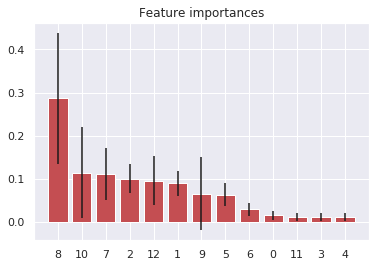

In [98]:

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Traza las características importantes del forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## ¿Qué atributo ha jugado el papel más importante en la decisión de solicitud de tarjeta de crédito?

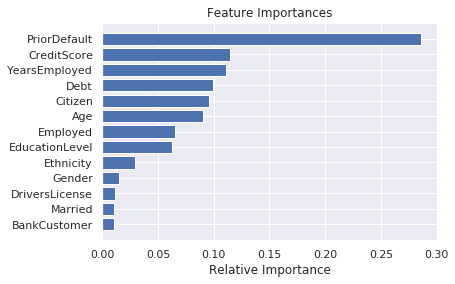

In [99]:
cc_apps2= cc_apps2.drop(['ApprovalStatus'], axis=1)

features = cc_apps2.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Optimización de resultados: ajuste de hiperparámetros

Podemos usar GridSearchCV para realizar ajustes de hiperparámetros en el Random Forest  y una cross validation para evitar el sobreajuste. El GridSearchCV realiza el cálculo utilizando todas las combinaciones entre la cuadrícula de parámetros.

Hace una validación cruzada también.

### Uso de redes neronales 

In [100]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(rescaledX,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)


In [101]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
model = keras.models.Sequential([
    keras.layers.Dense(552 ,input_dim=13),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [103]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [104]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
462/462 [==============================] - 0s - loss: 0.4754 - acc: 0.8052     
Epoch 2/50
462/462 [==============================] - 0s - loss: 0.3577 - acc: 0.8615     
Epoch 3/50
462/462 [==============================] - 0s - loss: 0.3330 - acc: 0.8788     
Epoch 4/50
462/462 [==============================] - 0s - loss: 0.3174 - acc: 0.8701     
Epoch 5/50
462/462 [==============================] - 0s - loss: 0.3545 - acc: 0.8550     
Epoch 6/50
462/462 [==============================] - 0s - loss: 0.3321 - acc: 0.8723     
Epoch 7/50
462/462 [==============================] - 0s - loss: 0.3244 - acc: 0.8723     
Epoch 8/50
462/462 [==============================] - 0s - loss: 0.3262 - acc: 0.8658     
Epoch 9/50
462/462 [==============================] - 0s - loss: 0.3083 - acc: 0.8831     
Epoch 10/50
462/462 [==============================] - 0s - loss: 0.2999 - acc: 0.8723     
Epoch 11/50
462/462 [==============================] - 0s - loss: 0.2912 - acc: 0.8788   

In [105]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

 32/228 [===>..........................] - ETA: 0s('Test accuracy:', 0.85526315789473684)


#### Grid searching, haciendo que el modelo funcione mejor

In [106]:
from sklearn.model_selection import GridSearchCV

# Define la cuadrícula de valores para tol y max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Cree un diccionario donde tol y max_iter son claves y las listas de sus valores son valores correspondientes
param_grid = dict(tol=tol, max_iter=max_iter)
print(param_grid)

{'max_iter': [100, 150, 200], 'tol': [0.01, 0.001, 0.0001]}


#### Encontrar el mejor modelo de rendimiento



In [107]:
# Instancia GridSearchCV con los parámetros requeridos
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit data a grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# resumen de resultados
best_score, best_params = grid_model_result.best_score_,grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.852174 using {'max_iter': 100, 'tol': 0.01}


Al construir este predictor de tarjeta de crédito, abordamos algunos de los pasos de preprocesamiento más conocidos, como el escalado, la codificación de etiquetas y la imputación de valores perdidos. Terminamos con algo de aprendizaje automático para predecir si la solicitud de una persona para una tarjeta de crédito sería aprobada o no, dada una informacion acerca de la persona.